# Baseline Method of Practical Topic Modeling -- LDA

### Import all the desired modules

In [1]:
import re
import numpy as np
import gensim
import random
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nltk.corpus import reuters 
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from gensim import corpora, models
%matplotlib inline

### Data Preprocessing -- Stemming and Tokenizing

In [2]:
# Split the datasets into training set and test set

#cachedStopWords = stopwords.words("english")
train_docs = []
test_docs = []

for doc_id in reuters.fileids():
    if doc_id.startswith("train"):
        train_docs.append(reuters.raw(doc_id))
    else:
        test_docs.append(reuters.raw(doc_id))

doc_set=train_docs
doc_test=test_docs

In [3]:
print len(doc_set)
print len(doc_test)

7769
3019


In [4]:
p_stemmer = PorterStemmer()
min_length = 3
SOME_FIXED_SEED = 42

# before training/inference:
np.random.seed(SOME_FIXED_SEED)

# create English stop words list
#print(tokens)
en_stop = get_stop_words('en')
tokenizer = RegexpTokenizer(r'\w+')

In [5]:
# Held-out Test Dataset

texts_test = []

# loop through document list
for i in doc_test:

    # clean and tokenize document string
    raw_test = i.lower()
    tokens_test = tokenizer.tokenize(raw_test)

    # remove stop words from tokens
    stopped_tokens_test = [i for i in tokens_test if not i in en_stop]
    p = re.compile('[a-zA-Z]+');
    filtered_tokens_test =list(filter(lambda token:p.match(token) and len(token)>=min_length,stopped_tokens_test))

    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in filtered_tokens]

    # add tokens to list
    texts_test.append(filtered_tokens_test)
#turn our tokenized documents into a id <-> term dictionary
dictionary_test = corpora.Dictionary(texts_test)

# convert tokenized documents into a document-term matrix
corpus_test = [dictionary_test.doc2bow(text_test) for text_test in texts_test]


# Training Dataset

texts = []

# loop through document list
for i in doc_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    p = re.compile('[a-zA-Z]+');
    filtered_tokens =list(filter(lambda token:p.match(token) and len(token)>=min_length,stopped_tokens))

    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in filtered_tokens]

    # add tokens to list
    texts.append(filtered_tokens)
#turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [74]:
corpus = []
doc_corpus = []
current_doc = None
with open('docword.nips.txt','r+') as nips_file:
    for line in nips_file:
        line = line.strip('\n')
        if line=='1500' or line=='12419' or line=='746316':
            pass
        else:
            docid,word_id,t = line.split()
            docid,word_id,t = int(docid),int(word_id),int(t)
            if current_doc==docid:
                doc_corpus.append((word_id,t))
            else:
                if current_doc:
                    corpus.append(doc_corpus)
                    doc_corpus = []
                current_doc = docid
                doc_corpus.append((word_id,t))
corpus.append(doc_corpus)

In [86]:
dictionary_nips = dict()
count = 1
with open('vocab.nips.txt','r+') as dict_file:
    for line in dict_file:
        word = line.strip('\n')
        dictionary_nips[count] =  word
        count += 1

In [76]:
dictionary_nips

{1: 'a2i',
 2: 'aaa',
 3: 'aaai',
 4: 'aapo',
 5: 'aat',
 6: 'aazhang',
 7: 'abandonment',
 8: 'abbott',
 9: 'abbreviated',
 10: 'abcde',
 11: 'abe',
 12: 'abeles',
 13: 'abi',
 14: 'abilistic',
 15: 'abilities',
 16: 'ability',
 17: 'abl',
 18: 'able',
 19: 'ables',
 20: 'ablex',
 21: 'ably',
 22: 'abnormal',
 23: 'abort',
 24: 'abound',
 25: 'abramowicz',
 26: 'abrash',
 27: 'abrupt',
 28: 'abruptly',
 29: 'abscissa',
 30: 'absence',
 31: 'absent',
 32: 'absolute',
 33: 'absolutely',
 34: 'absorb',
 35: 'absorbed',
 36: 'absorbing',
 37: 'absorption',
 38: 'abstr',
 39: 'abstract',
 40: 'abstracted',
 41: 'abstraction',
 42: 'abu',
 43: 'abundances',
 44: 'aca',
 45: 'acad',
 46: 'academic',
 47: 'academy',
 48: 'acc',
 49: 'accelerate',
 50: 'accelerated',
 51: 'accelerating',
 52: 'acceleration',
 53: 'accelerator',
 54: 'accent',
 55: 'accept',
 56: 'acceptable',
 57: 'acceptably',
 58: 'acceptance',
 59: 'accepted',
 60: 'accepting',
 61: 'acceptor',
 62: 'access',
 63: 'accessed

In [109]:
text_nips = []
for i in xrange(len(corpus)):
    new_list = []
    for w in xrange(len(corpus[i])):
        word,count = dictionary_nips[corpus[i][w][0]],corpus[i][w][1]
        new_word = [word]*count
        new_list.extend(new_word)
    text_nips.append(new_list)

dictionary = corpora.Dictionary(text_nips)

In [110]:
print dictionary

Dictionary(12375 unique tokens: [u'raining', u'func', u'cussed', u'xt_', u'foun']...)


In [111]:
text_nips_train = [text_nips[i] for i in xrange(len(text_nips)) if i not in test_idx] 
text_nips_test = [text_nips[i] for i in xrange(len(text_nips)) if i in test_idx] 
print len(text_nips_test),len(text_nips_train)
corpus_train = [corpus[i] for i in xrange(len(corpus)) if i not in test_idx] 
corpus_test = [corpus[i] for i in xrange(len(corpus)) if i in test_idx] 
print len(corpus_test)

300 1200
300


In [112]:
dictionary_train = corpora.Dictionary(text_nips_train)
print dictionary_train

Dictionary(12274 unique tokens: [u'raining', u'func', u'cussed', u'xt_', u'foun']...)


In [34]:
# generate LDA model from 1 to 151 topics
score_list = []
coherence_list = []
perplexity_list = []
start = 0
model = 1
numTopics = range(1,152,5)

f = open('Baseline_'+str(numTopics[0])+'_'+str(numTopics[-1])+'_'+str(len(numTopics))+'.txt','w+')
f.write('The number of topics: ' + str(numTopics) + '\n\n')

for i in numTopics:
    start_time = time.time()
    print('Model %d' %model)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=20)
    print("training time: --- %s seconds ---" % (time.time() - start_time))
    print("training time: --- %s minutes ---" % (float((time.time() - start_time)/60.0)))
    f.write('Model ' + str(model) + '\n')
    f.write("training time: --- " + str((time.time() - start_time)) + " seconds ---\n" )
    f.write("training time: --- " + str((float((time.time() - start_time)/60.0))) + " minutes ---\n") 
    model += 1
    topics = ldamodel.print_topics(num_topics=i,num_words=10)
    f.write('The generated topics: ' + str(topics) + '\n')
    Coherence = ldamodel.top_topics(corpus,num_words=10)
    perword_perplexity_bound = ldamodel.log_perplexity(corpus_test)
    perplexity = np.exp2(-perword_perplexity_bound)
    perplexity_list.append(perplexity)
    for j in Coherence:
        coherence_list.append(j[-1])
    f.write('The perlexity of held-out dataset: ' + str(perplexity) + '\n')
    f.write('The Coherence of topics: ' + str(coherence_list) + '\n')
    C_mean = np.mean(coherence_list[start:(start+i)])
    f.write('The average Coherence: ' + str(C_mean) + '\n')
    start = len(coherence_list) 
    score_list.append(C_mean)
    
f.write('#############\n#############\nThe whole score list: ' + str(score_list) + '\n')
f.write('#############\n#############\nThe perplexity list: ' + str(perplexity_list) + '\n')    
f.close()
print ('\n##################\nDone!!')

score_list_151 = score_list
coherence_list_151 = coherence_list
perplexity_list_151 = perplexity_list

Model 1


KeyboardInterrupt: 

In [9]:
# generate LDA model
score_list = []
coherence_list = []
perplexity_list = []
start = 0
model = 1
numTopics = range(1,32,3)

f = open('Baseline_'+str(numTopics[0])+'_'+str(numTopics[-1])+'_'+str(len(numTopics))+'.txt','w+')
f.write('The number of topics: ' + str(numTopics) + '\n\n')

for i in numTopics:
    start_time = time.time()
    print('Model %d' %model)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=20)
    print("training time: --- %s seconds ---" % (time.time() - start_time))
    print("training time: --- %s minutes ---" % (float((time.time() - start_time)/60.0)))
    f.write('Model ' + str(model) + '\n')
    f.write("training time: --- " + str((time.time() - start_time)) + " seconds ---\n" )
    f.write("training time: --- " + str((float((time.time() - start_time)/60.0))) + " minutes ---\n") 
    model += 1
    topics = ldamodel.print_topics(num_topics=i,num_words=10)
    f.write('The generated topics: ' + str(topics) + '\n')
    Coherence = ldamodel.top_topics(corpus,num_words=10)
    perword_perplexity_bound = ldamodel.log_perplexity(corpus_test)
    perplexity = np.exp2(-perword_perplexity_bound)
    perplexity_list.append(perplexity)
    for j in Coherence:
        coherence_list.append(j[-1])
    f.write('The perlexity of held-out dataset: ' + str(perplexity) + '\n')
    f.write('The Coherence of topics: ' + str(coherence_list) + '\n')
    C_mean = np.mean(coherence_list[start:(start+i)])
    f.write('The average Coherence: ' + str(C_mean) + '\n\n')
    start = len(coherence_list) 
    score_list.append(C_mean)
    
f.write('#############\n#############\nThe whole score list: ' + str(score_list) + '\n')
f.write('#############\n#############\nThe perplexity list: ' + str(perplexity_list) + '\n')
f.close()
print ('\n##################\nDone!!')

score_list_61 = score_list
coherence_list_61 = coherence_list
perplexity_list_61 = perplexity_list

Model 1
training time: --- 180.938225985 seconds ---
training time: --- 3.01568735043 minutes ---
Model 2
training time: --- 329.874155998 seconds ---
training time: --- 5.49798469941 minutes ---
Model 3
training time: --- 344.243612051 seconds ---
training time: --- 5.73746136824 minutes ---
Model 4
training time: --- 324.045623064 seconds ---
training time: --- 5.40082679987 minutes ---
Model 5
training time: --- 350.694467068 seconds ---
training time: --- 5.84568307002 minutes ---
Model 6
training time: --- 342.842923164 seconds ---
training time: --- 5.71410426696 minutes ---
Model 7
training time: --- 327.126669168 seconds ---
training time: --- 5.45217173497 minutes ---
Model 8
training time: --- 441.082038879 seconds ---
training time: --- 7.35161538124 minutes ---
Model 9
training time: --- 356.780060053 seconds ---
training time: --- 5.94639890194 minutes ---
Model 10
training time: --- 352.971642971 seconds ---
training time: --- 5.88291021585 minutes ---
Model 11
training t

###  All the generated topics are written into 2 txt files, and can be tracked afterwards

### Average Coherence 

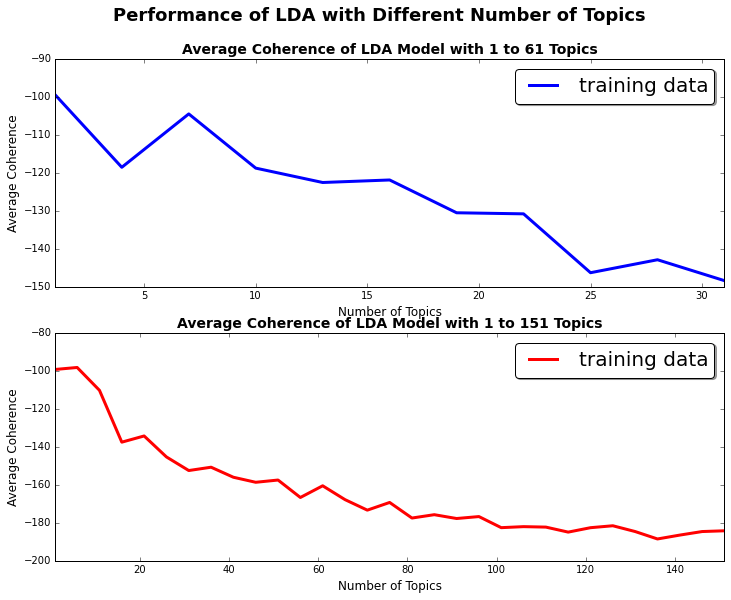

In [14]:
fig = plt.figure(facecolor='white',figsize=(12,9))
fig.suptitle('Performance of LDA with Different Number of Topics',fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.9)

ax0 = fig.add_subplot(211)
ax0.set_title('Average Coherence of LDA Model with 1 to 61 Topics',fontsize=14,fontweight='bold')
ax0.plot(range(1,32,3),score_list_61,label='training data',lw=3)
ax0.set_xlim(1,31)
ax0.set_ylabel('Average Coherence',fontsize=12)
ax0.set_xlabel('Number of Topics',fontsize=12)
ax0.legend(prop={'size':20},loc='upper right', fancybox=True, shadow=True, ncol=3)

ax1 = fig.add_subplot(212)
ax1.set_title('Average Coherence of LDA Model with 1 to 151 Topics',fontsize=14,fontweight='bold')
ax1.plot(range(1,152,5),score_list_151,label='training data',lw=3,c='r')
ax1.set_xlim(1,151)
ax1.set_ylabel('Average Coherence',fontsize=12)
ax1.set_xlabel('Number of Topics',fontsize=12)
ax1.legend(prop={'size':20},loc='upper right', fancybox=True, shadow=True, ncol=3)
plt.show()

#### Perplexity on held-out datasets

In [ ]:
fig1 = plt.figure(facecolor='white',figsize=(12,9))
fig1.suptitle('Perplexity of LDA model on Held-out Datasets',fontsize=18, fontweight='bold')
fig1.subplots_adjust(top=0.9)

ax0 = fig1.add_subplot(211)
ax0.set_title('Perplexity of LDA Model with 1 to 61 Topics',fontsize=14,fontweight='bold')
ax0.plot(range(1,32,3),perplexity_list_61,label='testing data',lw=3,ls=':')
ax0.set_xlim(1,31)
ax0.set_ylabel('Perplexity',fontsize=12)
ax0.set_xlabel('Number of Topics',fontsize=12)
ax0.legend(prop={'size':15},loc='lower right', fancybox=True, shadow=True, ncol=3)

ax1 = fig1.add_subplot(212)
ax1.set_title('Perplexity of LDA Model with 1 to 151 Topics',fontsize=14,fontweight='bold')
ax1.plot(range(1,152,2),perplexity_list_151,label='testing data',lw=3,ls=':',c='r')
ax1.set_xlim(1,61)
ax1.set_ylabel('Perplexity',fontsize=12)
ax1.set_xlabel('Number of Topics',fontsize=12)
ax1.legend(prop={'size':15},loc='lower right', fancybox=True, shadow=True, ncol=3)
plt.show()

## Parallel Version

In [ ]:
# Multiprocessing

score_list = []
perplexity_list = []
start = 0
model = 1
numTopics = range(1,152,5)

def cellfunc(i):
    start_time = time.time()
    model = i/5+1
    print('Model %d' %model)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=20)
    print("training time: --- %s seconds ---" % (time.time() - start_time))
    print("training time: --- %s minutes ---" % (float((time.time() - start_time)/60.0)))
    
    topics = ldamodel.print_topics(num_topics=i,num_words=10)
    Coherence = ldamodel.top_topics(corpus,num_words=10)
    perword_perplexity_bound = ldamodel.log_perplexity(corpus_test)
    perplexity = np.exp2(-perword_perplexity_bound)
    perplexity_list.append(perplexity)
    coherence_list = [j[-1] for j in Coherence]
    C_mean = np.mean(coherence_list)
    return C_mean

p = Pool(10)
score_list = p.map(cellfunc, numTopics)
print score_list

In [218]:
# Held-out Test Dataset

texts_test = []

# loop through document list
for i in doc_test:

    # clean and tokenize document string
    raw_test = i.lower()
    tokens_test = tokenizer.tokenize(raw_test)

    # remove stop words from tokens
    stopped_tokens_test = [i for i in tokens_test if not i in en_stop]
    p = re.compile('[a-zA-Z]+');
    filtered_tokens_test =list(filter(lambda token:p.match(token) and len(token)>=min_length,stopped_tokens_test))

    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in filtered_tokens]

    # add tokens to list
    texts_test.append(filtered_tokens_test)
#turn our tokenized documents into a id <-> term dictionary
dictionary_test = corpora.Dictionary(texts_test)

# convert tokenized documents into a document-term matrix
corpus_test = [dictionary_test.doc2bow(text_test) for text_test in texts_test]


# Training Dataset



# loop through document list
for i in text_nips_train:
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    p = re.compile('[a-zA-Z]+');
    filtered_tokens =list(filter(lambda token:p.match(token) and len(token)>=min_length,stopped_tokens))

    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in filtered_tokens]

    # add tokens to list
    texts.append(filtered_tokens)
#turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Nips Dataset

In [26]:
corpus = []
doc_corpus = []
current_doc = None
with open('docword.nips.txt','r+') as nips_file:
    for line in nips_file:
        line = line.strip('\n')
        if line=='1500' or line=='12419' or line=='746316':
            pass
        else:
            docid,word_id,t = line.split()
            docid,word_id,t = int(docid),int(word_id),int(t)
            if current_doc==docid:
                doc_corpus.append((word_id,t))
            else:
                if current_doc:
                    corpus.append(doc_corpus)
                    doc_corpus = []
                current_doc = docid
                doc_corpus.append((word_id,t))
corpus.append(doc_corpus)

In [27]:
dictionary_nips_trunc = dict()
count = 0
with open('vocab.nips.txt.trunc','r+') as dict_file:
    for line in dict_file:
        word = line.strip('\n')
        dictionary_nips_trunc[count] =  word
        count += 1

In [28]:
import scipy.io
S = scipy.io.loadmat('trainM_nips.full_docs.mat.trunc.mat')
M_train = S['M_train']

S = scipy.io.loadmat('testM_nips.full_docs.mat.trunc.mat')
M_test = S['M_test']



In [29]:
dictionary_nips_trunc[0]

'aaai'

In [30]:
text_train = []
for i in xrange(M_train.shape[1]):
    start = M_train.indptr[i]
    end = M_train.indptr[i+1]
    row = M_train.indices[start:end]
    count = M_train.data[start:end]
    row_text = []
    for j in xrange(len(row)):
        row_text.extend([dictionary_nips_trunc[int(row[j])]]*count[j])
    text_train.append(row_text)

    
text_test = []
for i in xrange(M_test.shape[1]):
    start = M_test.indptr[i]
    end = M_test.indptr[i+1]
    row = M_test.indices[start:end]
    count = M_test.data[start:end]
    row_text = []
    for j in xrange(len(row)):
        row_text.extend([dictionary_nips_trunc[int(row[j])]]*count[j])
    text_test.append(row_text)

csc_matrix((data, indices, indptr), [shape=(M, N)])
is the standard CSC representation where the row indices for column i are stored in indices[indptr[i]:indptr[i+1]] and their corresponding values are stored in data[indptr[i]:indptr[i+1]]. If the shape parameter is not supplied, the matrix dimensions are inferred from the index arrays.

In [31]:
dictionary_train = corpora.Dictionary(text_train)
corpus_train = [dictionary.doc2bow(t_train) for t_train in text_train]

dictionary_test = corpora.Dictionary(text_test)
corpus_test = [dictionary.doc2bow(t_test) for t_test in text_test]

In [32]:
print M_train.shape,M_test.shape

(2940, 1200) (2940, 300)


In [33]:
cd anchor-baggage/anchor-word-recovery/

[Errno 2] No such file or directory: 'anchor-baggage/anchor-word-recovery/'
/Users/keye/Documents/= =/Fall 2015/CML/proj/Vis_anchor/anchor-baggage/anchor-word-recovery


In [113]:
# generate LDA model from 1 to 151 topics
score_list = []
coherence_list = []
perplexity_list = []
start = 0
model = 1
numTopics = [50,100,150] 

f = open('Baseline_'+str(numTopics[0])+'_'+str(numTopics[-1])+'_'+str(len(numTopics))+'.txt','w+')
f.write('The number of topics: ' + str(numTopics) + '\n\n')

for i in numTopics:
    start_time = time.time()
    print('Model %d' %model)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus_train, num_topics=i, id2word = dictionary, passes=20)
    print("training time: --- %s seconds ---" % (time.time() - start_time))
    print("training time: --- %s minutes ---" % (float((time.time() - start_time)/60.0)))
    f.write('Model ' + str(model) + '\n')
    f.write("training time: --- " + str((time.time() - start_time)) + " seconds ---\n" )
    f.write("training time: --- " + str((float((time.time() - start_time)/60.0))) + " minutes ---\n") 
    model += 1
    topics = ldamodel.print_topics(num_topics=i,num_words=10)
    f.write('The generated topics: ' + str(topics) + '\n')
    Coherence = ldamodel.top_topics(corpus_train,num_words=10)
    #perword_perplexity_bound = ldamodel.log_perplexity(corpus_test)
    #perplexity = np.exp2(-perword_perplexity_bound)
    #perplexity_list.append(perplexity)
    for j in Coherence:
        coherence_list.append(j[-1])
    #f.write('The perlexity of held-out dataset: ' + str(perplexity) + '\n')
    f.write('The Coherence of topics: ' + str(coherence_list) + '\n')
    C_mean = np.mean(coherence_list[start:(start+i)])
    f.write('The average Coherence: ' + str(C_mean) + '\n')
    start = len(coherence_list) 
    score_list.append(C_mean)
    
f.write('#############\n#############\nThe whole score list: ' + str(score_list) + '\n')
#f.write('#############\n#############\nThe perplexity list: ' + str(perplexity_list) + '\n')    
f.close()
print ('\n##################\nDone!!')

score_list_151 = score_list
coherence_list_151 = coherence_list
#perplexity_list_151 = perplexity_list

Model 1
training time: --- 611.246528864 seconds ---
training time: --- 10.187515382 minutes ---
Model 2
training time: --- 687.668263197 seconds ---
training time: --- 11.461218667 minutes ---
Model 3
training time: --- 815.29727006 seconds ---
training time: --- 13.5885567983 minutes ---

##################
Done!!


In [6]:
# generate LDA model
score_list = []
coherence_list = []
perplexity_list = []
start = 0
model = 1
numTopics = range(1,32,3)

f = open('Baseline_'+str(numTopics[0])+'_'+str(numTopics[-1])+'_'+str(len(numTopics))+'.txt','w+')
f.write('The number of topics: ' + str(numTopics) + '\n\n')

for i in numTopics:
    start_time = time.time()
    print('Model %d' %model)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=20)
    print("training time: --- %s seconds ---" % (time.time() - start_time))
    print("training time: --- %s minutes ---" % (float((time.time() - start_time)/60.0)))
    f.write('Model ' + str(model) + '\n')
    f.write("training time: --- " + str((time.time() - start_time)) + " seconds ---\n" )
    f.write("training time: --- " + str((float((time.time() - start_time)/60.0))) + " minutes ---\n") 
    model += 1
    topics = ldamodel.print_topics(num_topics=i,num_words=10)
    f.write('The generated topics: ' + str(topics) + '\n')
    Coherence = ldamodel.top_topics(corpus,num_words=10)
    perword_perplexity_bound = ldamodel.log_perplexity(corpus_test)
    perplexity = np.exp2(-perword_perplexity_bound)
    perplexity_list.append(perplexity)
    for j in Coherence:
        coherence_list.append(j[-1])
    f.write('The perlexity of held-out dataset: ' + str(perplexity) + '\n')
    f.write('The Coherence of topics: ' + str(coherence_list) + '\n')
    C_mean = np.mean(coherence_list[start:(start+i)])
    f.write('The average Coherence: ' + str(C_mean) + '\n\n')
    start = len(coherence_list) 
    score_list.append(C_mean)
    
f.write('#############\n#############\nThe whole score list: ' + str(score_list) + '\n')
f.write('#############\n#############\nThe perplexity list: ' + str(perplexity_list) + '\n')
f.close()
print ('\n##################\nDone!!')

score_list_61 = score_list
coherence_list_61 = coherence_list
perplexity_list_61 = perplexity_list

Model 1


KeyboardInterrupt: 

ValueError: x and y must have same first dimension

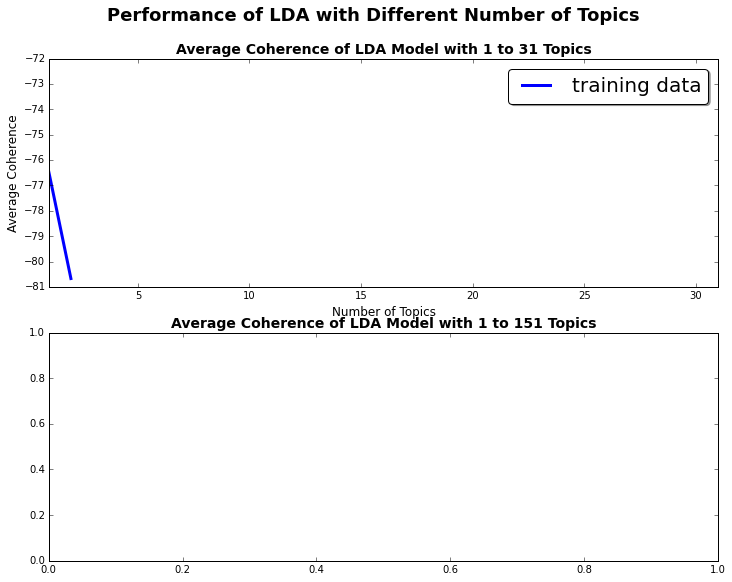

In [116]:
fig = plt.figure(facecolor='white',figsize=(12,9))
fig.suptitle('Performance of LDA with Different Number of Topics',fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.9)

ax0 = fig.add_subplot(211)
ax0.set_title('Average Coherence of LDA Model with 1 to 31 Topics',fontsize=14,fontweight='bold')
ax0.plot(range(3),score_list_151,label='training data',lw=3)
ax0.set_xlim(1,31)
ax0.set_ylabel('Average Coherence',fontsize=12)
ax0.set_xlabel('Number of Topics',fontsize=12)
ax0.legend(prop={'size':20},loc='upper right', fancybox=True, shadow=True, ncol=3)

ax1 = fig.add_subplot(212)
ax1.set_title('Average Coherence of LDA Model with 1 to 151 Topics',fontsize=14,fontweight='bold')
ax1.plot(range(1,152,5),score_list_151,label='training data',lw=3,c='r')
ax1.set_xlim(1,151)
ax1.set_ylabel('Average Coherence',fontsize=12)
ax1.set_xlabel('Number of Topics',fontsize=12)
ax1.legend(prop={'size':20},loc='upper right', fancybox=True, shadow=True, ncol=3)
plt.show()

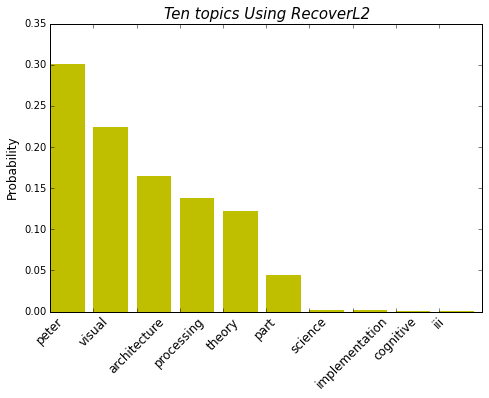

In [78]:
x = scipy.arange(10)
y = scipy.array([0.30082578 ,0.22472621 , 0.16497219,  0.13813335 , 0.12273078 , 0.0441538,0.00182447 , 0.0014889  , 0.00061377 , 0.00053074])
f = pylab.figure()
ax = f.add_axes([0.7, 1, 1, 1])
ax.bar(x, y,color='y',edgecolor = "none")
ax.set_title('Ten topics Using RecoverL2',fontsize=15,fontstyle='italic')
ax.set_xticks(x)
ax.set_ylabel('Probability',fontsize =12)
ax.set_xticklabels(['peter', 'visual', 'architecture', 'processing', 'theory', 'part', 'science', 'implementation', 'cognitive', 'iii']
,rotation=45,fontsize=12)
f.show()

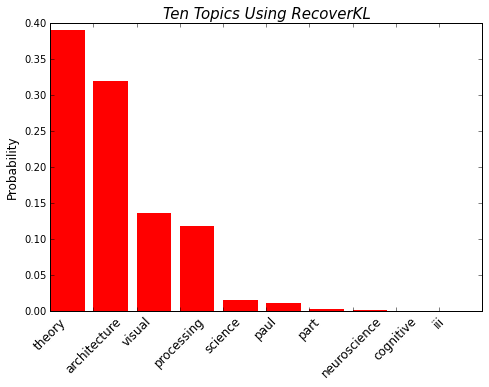

In [77]:
x = scipy.arange(10)
y = scipy.array([0.39082084 , 0.31991343  ,0.13675603,  0.11831456,  0.01610169 , 0.01138276,
 0.00409492,  0.00147776 , 0.00062175,  0.00051625])
f = pylab.figure()
ax = f.add_axes([0.7, 1, 1, 1])
ax.bar(x, y,color='r',edgecolor = "none")
ax.set_title('Ten Topics Using RecoverKL',fontsize=15,fontstyle='italic')
ax.set_xticks(x)
ax.set_ylabel('Probability',fontsize =12)
ax.set_xticklabels(['theory', 'architecture', 'visual', 'processing', 'science', 'paul', 'part', 'neuroscience', 'cognitive', 'iii']
,rotation=45,fontsize=12)
f.show()

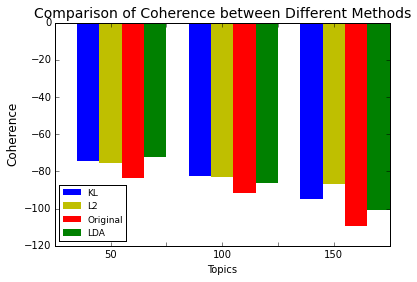

In [154]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [datetime.datetime(2011, 1, 4, 0, 0),
     datetime.datetime(2011, 1, 5, 0, 0),
     datetime.datetime(2011, 1, 6, 0, 0),datetime.datetime(2011, 1, 6, 0, 0)]
x = date2num(x)

#kl
z=[-75.5191854788,-83.1940641973,-85.4760703527,-86.7154686113]

#l2
y = [-74.1545049075
,-82.5555639793
,-90.8357850609
,-94.9494422512]

#original
k=[-83.4441338379
,-91.6677856228
,-99.4863863783
,-109.506447498]

#lda
t=[-72.315210084995172, -86.425626702838301, -100.670933028591492,0]

ax = plt.subplot(111)
ax.set_title('Comparison of Coherence between Different Methods',fontsize=14)
ax.set_xlabel('Topics')
ax.bar(x-0.2, y,width=0.2,color='b',align='center',edgecolor = "none",label='KL')
ax.bar(x, z,width=0.2,color='y',align='center',edgecolor = "none",label='L2')
ax.bar(x+0.2, k,width=0.2,color='r',align='center',edgecolor = "none",label='Original')
ax.bar(x+0.4,t,width=0.2,color='g',align='center',edgecolor = "none",label='LDA')
ax.set_ylabel('Coherence',fontsize=12)

ax.set_xticklabels(('','50', '','100','', '150', '','200'))
ax.legend(loc='bottom left',prop={'size':9})
plt.show()

In [117]:
coherence_list_151

[-19.853906338536024,
 -23.533865386827202,
 -24.983625446709624,
 -28.110711997022804,
 -29.155433036740071,
 -36.583873058880471,
 -44.470745465713627,
 -45.163138328684099,
 -46.339173726984903,
 -46.450999680828772,
 -49.222202419712282,
 -51.233667724979739,
 -52.290241829723357,
 -53.771985727497842,
 -53.859391135224705,
 -56.259691395046694,
 -58.865987263309506,
 -61.931922907935032,
 -62.667680740769541,
 -64.407000068446933,
 -65.723653691029327,
 -66.134975122068184,
 -69.101638087990466,
 -70.335402355615017,
 -72.468919056206943,
 -73.322844423854292,
 -75.353069582154887,
 -76.744971433813248,
 -76.999216209533344,
 -78.41866814135517,
 -78.547733999864818,
 -78.562984617519973,
 -81.341014559010901,
 -81.768009277055043,
 -81.873137149763323,
 -82.926511462590312,
 -83.107724672578286,
 -83.767896216972446,
 -88.246510677981576,
 -90.604807876072741,
 -91.600796639637551,
 -91.609903252601072,
 -108.03699791663151,
 -108.19466695901983,
 -109.50309657578183,
 -110.42958